In [ ]:
from google.colab import files    # importing files from local drive
uploaded = files.upload()

Saving Camp_stats.csv to Camp_stats.csv


In [ ]:
import csv
f=open("Camp_stats.csv")
for row in csv.reader(f):
    print(row)

['Refugee_Camp_Name', 'Country', 'Population_2006', 'Population_2014']
['Kakuma', 'Kenya', '90457', '153959']
['Hagadera', 'Kenya', '59185', '106968']
['Adjumani', 'Uganda', '54051', '96926']
['Dagahaley', 'Kenya', '39526', '88486']
['Zaatari', 'Jordan', '0', '84773']


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving airports.dat.csv to airports.dat.csv


In [ ]:
import csv
f = open("airports.dat.csv")
for row in csv.reader(f):
    print(row[1])

In [ ]:
lat = {}                                  # creating a dictionary lat to store latitude values from the airports csv
longitudes = {}                           # Creating a dictionary longitudes to store longitude values from the airport csv
f = open("airports.dat.csv")
for row in csv.reader(f):
  airport_id = row[0]
  lat[airport_id] = float(row[6])
  longitudes[airport_id] = float(row[7])

lat                                       # printing the latitudes

In [ ]:
from google.colab import files                    # importing files from local drive
uploaded = files.upload()                 

Saving geo_distance.py to geo_distance.py


In [ ]:
import geo_distance                                       # Code to import and check the geo_distance.py file to make sure it works.                
geo_distance.distance(-37.814,144.963,52.519,13.406)      # Melbourne to Berlin in km!      

15973.237754707652

In [ ]:
# Copy of geo_distance.py
# Using the Haversine formula for geographic Great Circle Distance
# As per https://en.wikipedia.org/wiki/Haversine_formula

from math import cos,radians,sin,pow,asin,sqrt

def distance(lat1, long1, lat2, long2):
  radius = 6371 # radius of the earth in km, roughly https://en.wikipedia.org/wiki/Earth_radius
  # Lat,long are in degrees but we need radians
  lat1 = radians(lat1)
  lat2 = radians(lat2)
  long1 = radians(long1)
  long2 = radians(long2)

  dlat = lat2-lat1
  dlon = long2-long1

  a = pow(sin(dlat/2),2) + cos(lat1)*cos(lat2)*pow(sin(dlon/2),2)
  distance = 2 * radius * asin(sqrt(a))

  return distance


In [ ]:
from google.colab import files                          # importing files from local drive
uploaded = files.upload()

Saving routes.dat.csv to routes.dat (1).csv


In [ ]:
distances = []                                                                  # building a list of route distances
f = open("routes.dat.csv")                                                              
for row in csv.reader(f):
  source_airport = row[3]
  dest_airport = row[5]
  if source_airport in lat and dest_airport in lat:
    source_lat = lat[source_airport]
    source_long = longitudes[source_airport]
    dest_lat = lat[dest_airport]
    dest_long = longitudes[dest_airport]
    distances.append(distance(source_lat,source_long,dest_lat,dest_long))

In [ ]:
distances                                                                       # printin distances

Text(0, 0.5, 'Number of flights')

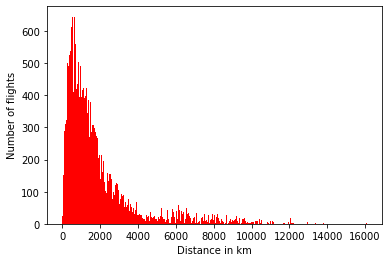

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(distances, 1000, facecolor='r')                                        # creating a histogram of distance covered in km vs. Number of flights with 1000 as bin size. 
plt.xlabel("Distance covered in km")
plt.ylabel("Number of flights")